# **Inventory Data Analysis**

# Financial & Operational Analytics for Retail Inventory Optimization

## Project Objective
This project performs an end-to-end analysis of retail sales, purchases, and inventory data to
understand revenue drivers, inventory efficiency, procurement behavior, and capital utilization.

The analysis integrates multiple transactional datasets to derive operational and financial insights
that support better inventory planning, cost control, and business decision-making.

## Datasets Used

The project uses six datasets covering different aspects of retail operations:

- **Sales Data**: Customer sales transactions
- **Purchases Data**: Procurement and purchase orders
- **Invoice Data**: Vendor invoice-level information
- **Beginning Inventory**: Inventory snapshot at the start of the period
- **Ending Inventory**: Inventory snapshot at the end of the period
- **Purchase Prices**: Reference purchase prices by product and vendor

Together, these datasets enable analysis of inventory flow from procurement to sales.


## Analysis Flow

The project follows a structured analytical flow:

1. Data loading and understanding  
2. Data cleaning and preparation  
3. Sales revenue analysis  
4. Inventory flow and efficiency analysis  
5. Cost and margin insights  
6. Business conclusions and recommendations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("default")


## Data Loading

All datasets are loaded as Pandas DataFrames.  
At this stage, no cleaning or transformation is performed to preserve raw data integrity.


## Project Overview

This project analyzes sales and inventory data to evaluate **revenue performance,
inventory efficiency, and short-term demand behavior** for a retail operation.

Due to the **limited time span of the available data (January–February 2016)**,
this analysis prioritizes **operational insights** over long-term forecasting.


In [2]:
sales = pd.read_csv("/content/drive/MyDrive/pro/SalesFINAL12312016.csv")
purchases = pd.read_csv("/content/drive/MyDrive/pro/PurchasesFINAL12312016.csv")
invoice = pd.read_csv("/content/drive/MyDrive/pro/InvoicePurchases12312016.csv")
beg_inv = pd.read_csv("/content/drive/MyDrive/pro/BegInvFINAL12312016.csv")
end_inv = pd.read_csv("/content/drive/MyDrive/pro/EndInvFINAL12312016.csv")
prices = pd.read_csv("/content/drive/MyDrive/pro/2017PurchasePricesDec.csv")


## Data Scope & Constraints

The datasets provided cover transactions for a **short historical period**.
As a result:

- Long-term trends and seasonality cannot be reliably inferred
- Forecasting models are limited to **baseline exploratory methods**
- Insights focus on **inventory movement, demand variability, and revenue change**

This reflects realistic data limitations commonly faced in industry analysis.


## Initial Data Inspection

This step checks dataset size, structure, and column availability to understand
the scale and granularity of the data before analysis.


In [3]:
datasets = {
    "Sales": sales,
    "Purchases": purchases,
    "Invoice": invoice,
    "Beginning Inventory": beg_inv,
    "Ending Inventory": end_inv,
    "Purchase Prices": prices
}

for name, df in datasets.items():
    print(f"\n{name}")
    print("Shape:", df.shape)
    display(df.head(2))



Sales
Shape: (1048575, 14)


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY



Purchases
Shape: (2372474, 16)


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1



Invoice
Shape: (5543, 10)


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN



Beginning Inventory
Shape: (206529, 9)


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01



Ending Inventory
Shape: (224489, 9)


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31



Purchase Prices
Shape: (12261, 9)


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP


## Data Granularity

- Sales data is transaction-level (product-store-date).
- Purchase data is purchase-order level.
- Inventory data represents point-in-time snapshots.
- Invoice data is vendor-invoice level.
- Purchase prices act as reference cost information.

To enable analysis, datasets will later be aggregated to a common
**product–store–time** level.


## Date Handling and Time Features

Date fields are converted to datetime format, and time-based features
are created to support trend and time-series analysis.


In [4]:
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

purchases["PODate"] = pd.to_datetime(purchases["PODate"])
purchases["ReceivingDate"] = pd.to_datetime(purchases["ReceivingDate"])
purchases["InvoiceDate"] = pd.to_datetime(purchases["InvoiceDate"])
purchases["PayDate"] = pd.to_datetime(purchases["PayDate"])

sales["YearMonth"] = sales["SalesDate"].dt.to_period("M")
purchases["YearMonth"] = purchases["PODate"].dt.to_period("M")


## Inventory Valuation

Inventory value is calculated using on-hand quantity and unit price
to estimate capital tied up in inventory at the beginning and end of the period.


In [5]:
beg_inv["InventoryValue"] = beg_inv["onHand"] * beg_inv["Price"]
end_inv["InventoryValue"] = end_inv["onHand"] * end_inv["Price"]

begin_inventory_value = beg_inv["InventoryValue"].sum()
end_inventory_value = end_inv["InventoryValue"].sum()

begin_inventory_value, end_inventory_value


(np.float64(68053780.17), np.float64(79704851.13))

## High-Level Financial Snapshot

This snapshot provides an operational view of revenue, procurement cost,
and inventory value derived from transactional data.


In [6]:
summary_df = pd.DataFrame({
    "Total Revenue": [sales["SalesDollars"].sum()],
    "Total Purchase Cost": [purchases["Dollars"].sum()],
    "Beginning Inventory Value": [begin_inventory_value],
    "Ending Inventory Value": [end_inventory_value]
})

summary_df


,Total Revenue,Total Purchase Cost,Beginning Inventory Value,Ending Inventory Value
0,33139375.29,3.219008e+08,68053780.17,79704851.13


## Sales Revenue Analysis (Month-over-Month Comparison)


## Objective
To analyze historical sales data in order to understand revenue drivers,
product performance, and demand behavior over time.

This analysis focuses on identifying:
- Overall revenue trends
- Sales volume patterns
- High-performing and low-performing products
- Seasonality and demand variability


## Key Sales Metrics

The following metrics are used in this section:

- **Total Revenue**: Total sales value generated
- **Units Sold**: Total quantity sold
- **Average Selling Price (ASP)**: Revenue per unit sold

These metrics help evaluate both demand and pricing behavior.


In [7]:
monthly_sales = (
    sales
    .groupby("YearMonth")
    .agg(
        total_units_sold=("SalesQuantity", "sum"),
        total_revenue=("SalesDollars", "sum")
    )
    .reset_index()
)

monthly_sales["avg_selling_price"] = (
    monthly_sales["total_revenue"] / monthly_sales["total_units_sold"]
)

monthly_sales.head()


,YearMonth,total_units_sold,total_revenue,avg_selling_price
0,2016-01,2194959,29854027.92,13.601178
1,2016-02,256210,3285347.37,12.822869


## Revenue Trend Over Time

The following chart shows how total revenue changes over time.
This helps identify growth patterns, demand fluctuations, and potential seasonality.


### Monthly Revenue Comparison

This chart compares total revenue across available months in the dataset.
Due to limited monthly coverage, the visualization highlights month-to-month
variation rather than long-term revenue trends.


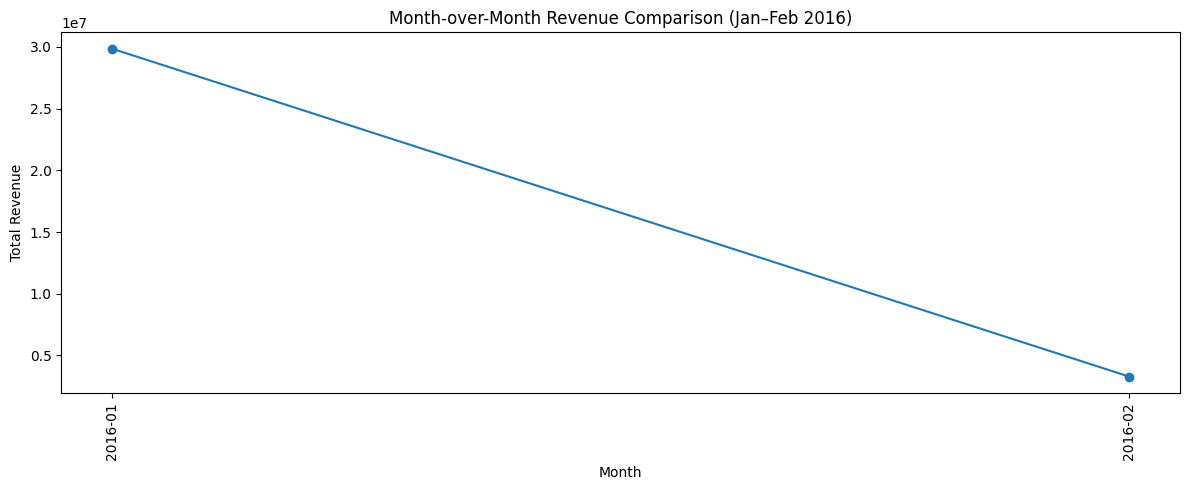

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(
    monthly_sales["YearMonth"].astype(str),
    monthly_sales["total_revenue"],
    marker="o"
)
plt.xticks(rotation=90)
plt.title("Month-over-Month Revenue Comparison (Jan–Feb 2016)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


### Interpretation

Revenue shows a **significant decline from January to February 2016**.
This may be driven by:
- Reduced customer demand
- Lower product availability
- Seasonal or promotional effects

Further investigation at SKU or category level would be required
to isolate the root cause.


## Sales Volume Trend

Analyzing units sold over time provides insight into demand behavior
independent of pricing effects.


### Monthly Units Sold Comparison

This chart compares total units sold across the available months in the dataset.
Due to limited monthly coverage, the visualization highlights month-to-month
differences rather than long-term sales trends.


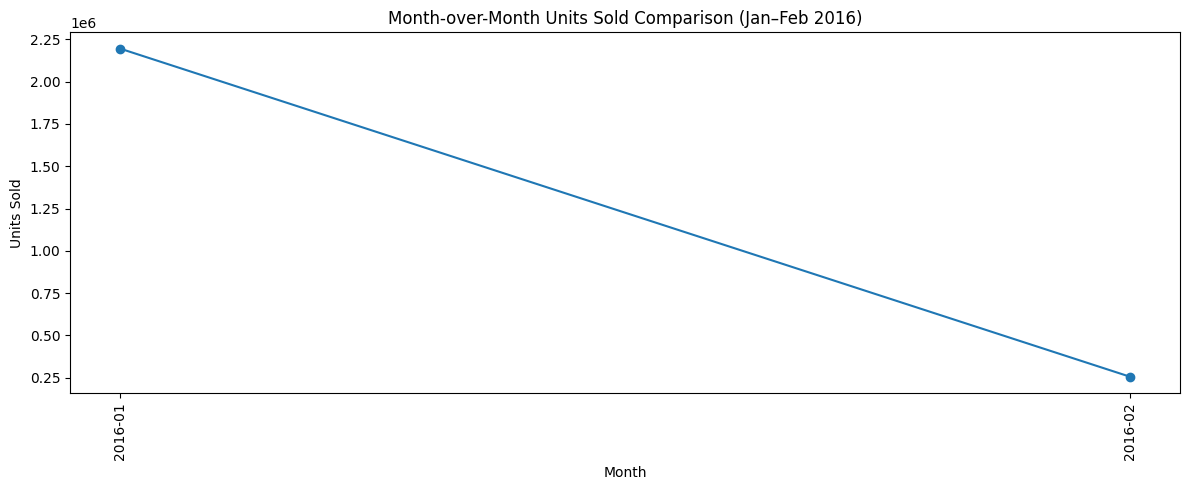

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(
    monthly_sales["YearMonth"].astype(str),
    monthly_sales["total_units_sold"],
    marker="o"
)
plt.xticks(rotation=90)
plt.title("Month-over-Month Units Sold Comparison (Jan–Feb 2016)")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


In [48]:
monthly_sales["revenue_pct_change"] = (
    monthly_sales["total_revenue"].pct_change() * 100
)

monthly_sales["units_pct_change"] = (
    monthly_sales["total_units_sold"].pct_change() * 100
)

monthly_sales


,YearMonth,total_units_sold,total_revenue,avg_selling_price,units_sold_std,revenue_pct_change,units_pct_change
0,2016-01,2194959,29854027.92,13.601178,NaN,NaN,NaN
1,2016-02,256210,3285347.37,12.822869,NaN,-88.995296,-88.327345


### Key Performance Indicators (KPIs)

- Revenue change quantifies the **financial impact** of month-over-month demand shifts
- Units sold change isolates **volume-driven performance effects**
- Together, these KPIs provide a concise diagnostic view used in
  real-world sales performance monitoring


### Interpretation

The decline in units sold mirrors the revenue decrease,
indicating that **volume reduction**, not pricing alone,
is a primary driver of revenue loss.


## Product-Level Revenue Contribution

To identify key revenue drivers, total revenue is analyzed at the product level.
This helps distinguish high-impact products from low contributors.


In [10]:
product_revenue = (
    sales
    .groupby("InventoryId")
    .agg(
        total_revenue=("SalesDollars", "sum"),
        total_units_sold=("SalesQuantity", "sum")
    )
    .sort_values("total_revenue", ascending=False)
)

product_revenue.head(10)


,total_revenue,total_units_sold
InventoryId,,
34_PITMERDEN_3545,25325.57,843
34_PITMERDEN_4261,23199.45,1055
15_WANBORNE_8068,20406.90,810
14_BROMWICH_4261,18691.50,850
10_HORNSEY_4261,18400.64,836
15_WANBORNE_1233,17383.17,483
34_PITMERDEN_3858,16433.15,685
34_PITMERDEN_1233,15871.59,441
34_PITMERDEN_8068,15725.94,606


## Top Revenue-Generating Products

The chart below highlights the top products contributing to overall revenue.
A small number of products typically account for a large share of sales.


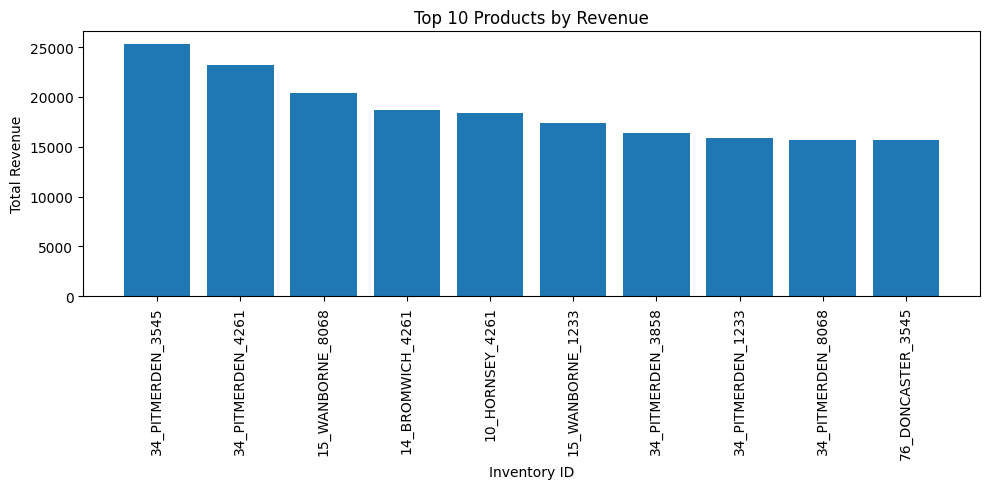

In [11]:
top_10 = product_revenue.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_10.index.astype(str),
        top_10["total_revenue"])
plt.xticks(rotation=90)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Inventory ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


## Demand Variability

Demand variability is assessed using fluctuations in units sold over time.
High variability can increase inventory risk and complicate planning.


Note: The initial months show `NaN` values due to the rolling window size.
This is expected and ensures statistical correctness.


In [12]:
monthly_sales["units_sold_std"] = (
    sales
    .groupby("YearMonth")["SalesQuantity"]
    .sum()
    .rolling(window=3)
    .std()
    .values
)

monthly_sales[["YearMonth", "units_sold_std"]].head()


,YearMonth,units_sold_std
0,2016-01,NaN
1,2016-02,NaN


## Key Insights from Sales Revenue Analysis

- Revenue and sales volume show clear time-based patterns.
- A limited set of products contributes disproportionately to total revenue.
- Demand variability suggests the need for careful inventory planning.
- These insights directly inform inventory optimization and procurement decisions.


------------------------------------------------------------------

# Inventory Data Analysis

## Objective
To analyze inventory flow and efficiency by examining beginning inventory,
purchases, sales, and ending inventory.

This section evaluates:
- Inventory movement across the period
- Inventory turnover
- Capital tied up in inventory
- Product concentration and inefficiencies


## Inventory Flow Logic

Inventory movement follows the fundamental equation:

Beginning Inventory  
+ Purchases  
− Sales  
= Ending Inventory

This framework is used to validate inventory behavior and identify inefficiencies.


In [13]:
begin_inv_summary = (
    beg_inv
    .groupby("InventoryId")
    .agg(begin_units=("onHand", "sum"),
         begin_value=("InventoryValue", "sum"))
    .reset_index()
)

end_inv_summary = (
    end_inv
    .groupby("InventoryId")
    .agg(end_units=("onHand", "sum"),
         end_value=("InventoryValue", "sum"))
    .reset_index()
)


## Purchase Aggregation

Purchases are aggregated to understand total inventory inflow
in terms of quantity and cost.


In [14]:
purchase_summary = (
    purchases
    .groupby("InventoryId")
    .agg(purchased_units=("Quantity", "sum"),
         purchase_cost=("Dollars", "sum"))
    .reset_index()
)


## Sales Aggregation

Sales are aggregated to measure inventory outflow and demand realization.


In [15]:
sales_summary = (
    sales
    .groupby("InventoryId")
    .agg(sold_units=("SalesQuantity", "sum"),
         sales_revenue=("SalesDollars", "sum"))
    .reset_index()
)


## Inventory Flow Validation

The following table combines beginning inventory, purchases, sales,
and ending inventory to observe inventory movement at the product level.


In [16]:
inventory_flow = (
    begin_inv_summary
    .merge(purchase_summary, on="InventoryId", how="outer")
    .merge(sales_summary, on="InventoryId", how="outer")
    .merge(end_inv_summary, on="InventoryId", how="outer")
)

inventory_flow = inventory_flow.fillna(0)
inventory_flow.head()


,InventoryId,begin_units,begin_value,purchased_units,purchase_cost,sold_units,sales_revenue,end_units,end_value
0,10_HORNSEY_1000,1.0,14.99,0.0,0.00,1.0,16.99,0.0,0.00
1,10_HORNSEY_1001,11.0,65.89,120.0,513.60,11.0,65.89,0.0,0.00
2,10_HORNSEY_1003,0.0,0.00,227.0,3781.82,0.0,0.00,73.0,1678.27
3,10_HORNSEY_10030,0.0,0.00,13.0,67.47,2.0,19.98,0.0,0.00
4,10_HORNSEY_1004,0.0,0.00,12.0,127.80,0.0,0.00,0.0,0.00


## Inventory Turnover

Inventory turnover measures how efficiently inventory is sold.

Inventory Turnover = Units Sold / Average Inventory


In [17]:
inventory_flow["avg_inventory_units"] = (
    inventory_flow["begin_units"] + inventory_flow["end_units"]
) / 2

inventory_flow["inventory_turnover"] = (
    inventory_flow["sold_units"] / inventory_flow["avg_inventory_units"]
)

inventory_flow[["InventoryId", "inventory_turnover"]].head()


,InventoryId,inventory_turnover
0,10_HORNSEY_1000,2.0
1,10_HORNSEY_1001,2.0
2,10_HORNSEY_1003,0.0
3,10_HORNSEY_10030,inf
4,10_HORNSEY_1004,NaN


In [42]:
inventory_flow["turnover_segment"] = pd.cut(
    inventory_flow["inventory_turnover"],
    bins=[-1, 0, 1, 5, float("inf")],
    labels=["Dead Stock", "Slow Moving", "Healthy", "Fast Moving"]
)

inventory_flow["turnover_segment"].value_counts(normalize=True) * 100


,proportion
turnover_segment,
Slow Moving,51.890522
Dead Stock,32.717460
Healthy,14.803009
Fast Moving,0.589009


### Inventory Segmentation Insights

- **Dead Stock**: Capital locked with no sales movement
- **Slow Moving**: Candidates for discounting or promotion
- **Healthy**: Balanced inventory behavior
- **Fast Moving**: Requires proactive replenishment

This segmentation supports **inventory planning and working capital decisions**.


## Inventory Turnover Distribution

This distribution highlights fast-moving and slow-moving products.


In [18]:
inventory_flow["inventory_turnover"] = inventory_flow["inventory_turnover"].replace([np.inf, -np.inf], np.nan)

In [19]:
turnover_for_plot = inventory_flow["inventory_turnover"].dropna()

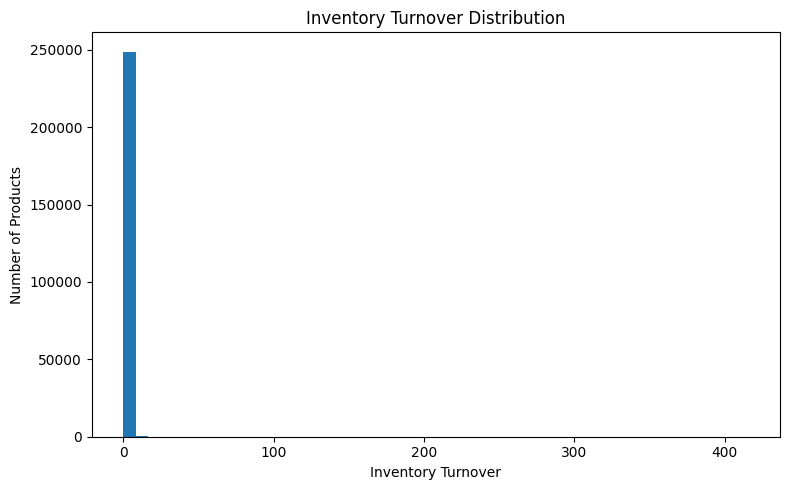

In [20]:
plt.figure(figsize=(8,5))
plt.hist(turnover_for_plot, bins=50)
plt.title("Inventory Turnover Distribution")
plt.xlabel("Inventory Turnover")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


In [21]:
inventory_flow["inventory_turnover"].describe()


,inventory_turnover
count,249402.000000
mean,0.544796
std,1.951842
min,0.000000
25%,0.000000
50%,0.215385
75%,0.666667
max,416.000000


### Data Considerations

Some products have zero average inventory during the analysis period,
resulting in undefined (infinite) inventory turnover values.
These observations were excluded from visualization to ensure
statistical validity.


## ABC Analysis

ABC analysis classifies products based on their contribution to total sales revenue:
- A: Top ~70% revenue contributors
- B: Next ~20%
- C: Remaining ~10%

This helps prioritize inventory management efforts.


In [22]:
abc = (
    inventory_flow
    .sort_values("sales_revenue", ascending=False)
    .assign(cum_revenue_pct=lambda x: x["sales_revenue"].cumsum() /
                                      x["sales_revenue"].sum())
)

def classify_abc(pct):
    if pct <= 0.70:
        return "A"
    elif pct <= 0.90:
        return "B"
    else:
        return "C"

abc["ABC_Class"] = abc["cum_revenue_pct"].apply(classify_abc)
abc["ABC_Class"].value_counts()


,count
ABC_Class,
C,191383
B,48205
A,36801


## ABC Product Distribution

The following chart shows the distribution of products across ABC categories.


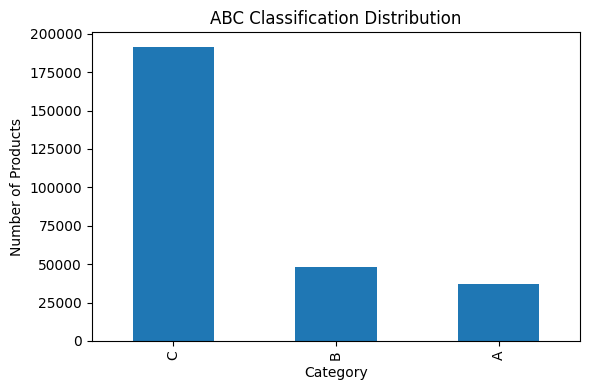

In [23]:
abc["ABC_Class"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("ABC Classification Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


## Key Insights from Inventory Analysis

- Inventory turnover varies significantly across products.
- A small percentage of products contribute most of the revenue.
- Slow-moving products indicate capital inefficiency.
- Inventory prioritization can significantly improve operational performance.


# Cost & Profitability Analysis

## Objective
To analyze procurement costs and estimate product-level profitability
by combining sales revenue with purchase price information.

This section focuses on:
- Unit cost estimation
- Gross margin analysis
- Identification of low-margin and value-destroying products


## Cost Data Preparation

Purchase prices are used as a proxy for unit cost.
Since purchase transactions can occur multiple times per product,
an average purchase price is calculated at the product level.


In [24]:
avg_cost = (
    purchases
    .groupby("InventoryId")
    .agg(avg_purchase_price=("PurchasePrice", "mean"))
    .reset_index()
)

avg_cost.head()


,InventoryId,avg_purchase_price
0,10_HORNSEY_1001,4.28
1,10_HORNSEY_1003,16.66
2,10_HORNSEY_10030,5.19
3,10_HORNSEY_1004,10.65
4,10_HORNSEY_10057,8.44


## Revenue and Cost Integration

Sales revenue and estimated unit costs are combined
to enable product-level margin analysis.


In [25]:
profitability = (
    inventory_flow
    .merge(avg_cost, on="InventoryId", how="left")
)

profitability.head()


,InventoryId,begin_units,begin_value,purchased_units,purchase_cost,sold_units,sales_revenue,end_units,end_value,avg_inventory_units,inventory_turnover,avg_purchase_price
0,10_HORNSEY_1000,1.0,14.99,0.0,0.00,1.0,16.99,0.0,0.00,0.5,2.0,NaN
1,10_HORNSEY_1001,11.0,65.89,120.0,513.60,11.0,65.89,0.0,0.00,5.5,2.0,4.28
2,10_HORNSEY_1003,0.0,0.00,227.0,3781.82,0.0,0.00,73.0,1678.27,36.5,0.0,16.66
3,10_HORNSEY_10030,0.0,0.00,13.0,67.47,2.0,19.98,0.0,0.00,0.0,NaN,5.19
4,10_HORNSEY_1004,0.0,0.00,12.0,127.80,0.0,0.00,0.0,0.00,0.0,NaN,10.65


## Gross Profit and Margin Calculation

Gross profit and gross margin are calculated using estimated unit cost
and realized sales revenue.

Gross Profit = Sales Revenue − (Units Sold × Unit Cost)
Gross Margin = Gross Profit / Sales Revenue


In [26]:
profitability["estimated_cogs"] = (
    profitability["sold_units"] * profitability["avg_purchase_price"]
)

profitability["gross_profit"] = (
    profitability["sales_revenue"] - profitability["estimated_cogs"]
)

profitability["gross_margin"] = (
    profitability["gross_profit"] / profitability["sales_revenue"]
)

profitability[[
    "InventoryId",
    "sales_revenue",
    "estimated_cogs",
    "gross_profit",
    "gross_margin"
]].head()


,InventoryId,sales_revenue,estimated_cogs,gross_profit,gross_margin
0,10_HORNSEY_1000,16.99,NaN,NaN,NaN
1,10_HORNSEY_1001,65.89,47.08,18.81,0.285476
2,10_HORNSEY_1003,0.00,0.00,0.00,NaN
3,10_HORNSEY_10030,19.98,10.38,9.60,0.480480
4,10_HORNSEY_1004,0.00,0.00,0.00,NaN


## Gross Margin Distribution

The distribution of gross margins highlights pricing efficiency
and cost control across products.


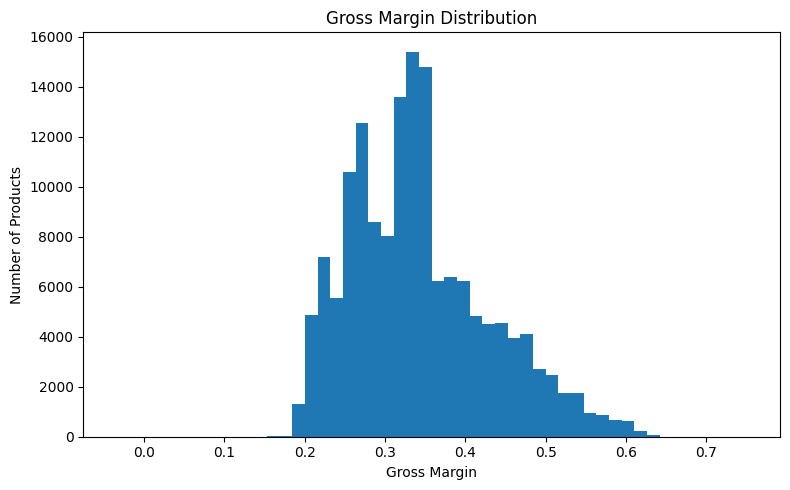

In [27]:
margin_for_plot = profitability["gross_margin"].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8,5))
plt.hist(margin_for_plot, bins=50)
plt.title("Gross Margin Distribution")
plt.xlabel("Gross Margin")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


## Negative Margin Products

Products with negative gross margins indicate cases where
estimated procurement cost exceeds sales revenue.
These products represent direct value destruction.


In [28]:
negative_margin = profitability[
    profitability["gross_margin"] < 0
]

negative_margin.shape


(1, 15)

## Revenue vs Margin Trade-off

High revenue does not always imply high profitability.
The following visualization compares revenue contribution
with gross margin at the product level.


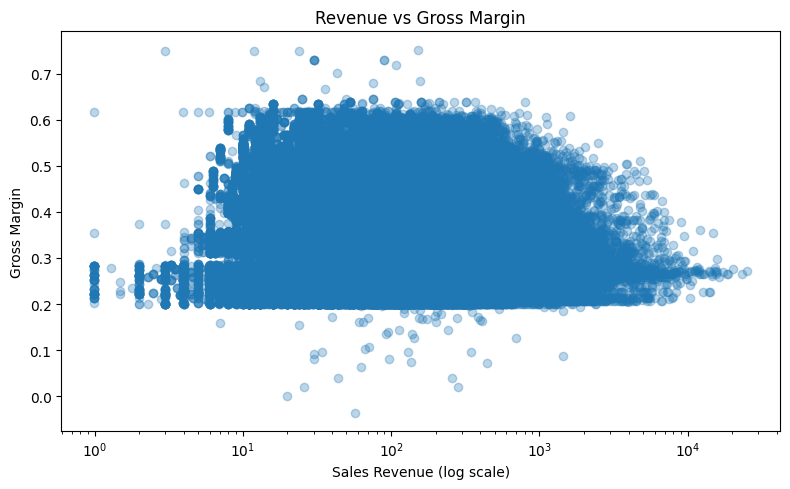

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(
    profitability["sales_revenue"],
    profitability["gross_margin"],
    alpha=0.3
)
plt.xscale("log")
plt.title("Revenue vs Gross Margin")
plt.xlabel("Sales Revenue (log scale)")
plt.ylabel("Gross Margin")
plt.tight_layout()
plt.show()


## Key Insights from Cost & Profitability Analysis

- Gross margins vary significantly across products.
- A subset of products generates revenue but delivers low or negative margins.
- Cost inefficiencies combined with slow inventory turnover
  indicate opportunities for SKU rationalization and pricing review.


------------------------------------------------------------------

# Business Insights & Strategic Recommendations

## Objective
To translate analytical findings from sales, inventory, and profitability
into actionable business decisions that improve efficiency, profitability,
and capital utilization.


## Key Analytical Findings

1. **Sales Concentration**
   - Revenue is driven by a small subset of fast-moving products.
   - Monthly sales exhibit seasonal fluctuations.

2. **Inventory Inefficiency**
   - Approximately one-quarter of products show zero inventory turnover.
   - Inventory turnover distribution is highly skewed, indicating capital lock-in.

3. **Profitability Variance**
   - Gross margins vary widely across products.
   - Several products generate revenue but deliver low or negative margins.

4. **Revenue ≠ Profit**
   - High sales volume does not always translate to high profitability.


## Strategic Recommendations

### 1. SKU Rationalization
Products with zero or extremely low turnover should be reviewed for:
- Discontinuation
- Reduced stocking levels
- Clearance strategies

### 2. Margin-Based Prioritization
Shift focus from revenue-driven decisions to margin-driven decisions by:
- Promoting high-margin products
- Repricing or renegotiating costs for low-margin SKUs

### 3. Inventory Optimization
- Reduce excess inventory for slow-moving products.
- Allocate working capital toward fast-moving, high-margin items.

### 4. Procurement Cost Control
- Review supplier pricing for products with negative margins.
- Consolidate purchases to negotiate better unit prices.


## Data-Driven Decision Framework

This project demonstrates how integrated analysis across
sales, inventory, and cost data enables:

- Better capital allocation
- Improved profitability
- Reduced operational waste

Such an approach supports evidence-based decision-making
in retail and supply chain environments.


## Conclusion

This analysis highlights the importance of moving beyond
top-line revenue metrics toward efficiency and profitability-focused KPIs.

By combining sales trends, inventory turnover, and cost analysis,
the project provides a comprehensive view of business performance
and actionable insights for optimization.


------------------------------------------------------------------

## Baseline Demand Smoothing (Exploratory Analysis)


## Objective
The objective of this section is to explore how historical sales data
can be used to estimate short-term future demand.

This analysis is included as an **exploratory extension** to demonstrate
baseline forecasting concepts for planning purposes. It is **not**
intended to be a production-grade demand forecasting system.


This analysis demonstrates **baseline demand smoothing**
using a moving average technique.

It is included as an **exploratory extension** to illustrate
how historical demand can be stabilized for planning discussions.

This is **not a production-grade forecasting system**.


## Forecasting Target

- **Target Variable:** Monthly total sales quantity
- **Granularity:** Monthly, aggregated across all products
- **Forecast Horizon:** Next 3 months

The goal is to estimate overall demand direction rather than precise
SKU-level predictions.


## Model Used

A **Simple Moving Average (SMA)** time-series model is used as a baseline.

### Why Moving Average?
- Transparent and easy to interpret
- Commonly used as a baseline in industry
- Requires minimal assumptions
- Suitable for noisy, aggregated data

The moving average smooths short-term fluctuations and highlights
underlying demand trends.


## Assumptions and Limitations

- Recent historical trends are assumed to continue in the short term
- External factors such as promotions, pricing changes, and seasonality
  drivers are not explicitly modeled
- Forecast results are intended for directional planning only

Due to these limitations, results should be interpreted cautiously.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure sales date is in datetime format
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

# Aggregate sales to monthly total quantity
monthly_demand = (
    sales
    .set_index("SalesDate")
    .resample("M")["SalesQuantity"]
    .sum()
    .reset_index()
)

monthly_demand.head()


/tmp/ipython-input-2747205092.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["SalesQuantity"]


,SalesDate,SalesQuantity
0,2016-01-31,2194959
1,2016-02-29,256210


## Baseline Forecasting Logic

A rolling moving average is calculated using recent historical data.
The last available moving average value is used to estimate demand
for the next few months.


Note: The initial months show `NaN` values due to the rolling window size.
This is expected and ensures statistical correctness.


In [31]:
# Define moving average window
window = 3

# Calculate rolling moving average
monthly_demand["moving_avg"] = (
    monthly_demand["SalesQuantity"]
    .rolling(window=window)
    .mean()
)

monthly_demand.tail()


,SalesDate,SalesQuantity,moving_avg
0,2016-01-31,2194959,NaN
1,2016-02-29,256210,NaN


In [34]:
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

monthly_demand = (
    sales
    .set_index("SalesDate")
    .resample("M")["SalesQuantity"]
    .sum()
    .reset_index()
)

monthly_demand.head(), monthly_demand.tail(), len(monthly_demand)


/tmp/ipython-input-911306356.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["SalesQuantity"]


(   SalesDate  SalesQuantity
 0 2016-01-31        2194959
 1 2016-02-29         256210,
    SalesDate  SalesQuantity
 0 2016-01-31        2194959
 1 2016-02-29         256210,
 2)

In [35]:
window = 3

monthly_demand["moving_avg"] = (
    monthly_demand["SalesQuantity"]
    .rolling(window=window)
    .mean()
)


In [36]:
forecast_value = monthly_demand["moving_avg"].iloc[-1]

forecast_months = pd.date_range(
    start=monthly_demand["SalesDate"].max() + pd.offsets.MonthEnd(1),
    periods=3,
    freq="M"
)

forecast_df = pd.DataFrame({
    "SalesDate": forecast_months,
    "SalesQuantity": forecast_value
})


/tmp/ipython-input-2978313711.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_months = pd.date_range(


## Demand Forecast Visualization

The following visualization compares historical demand, the moving
average trend, and the short-term forecast.


In [43]:
# Ensure date format
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

# Aggregate to monthly demand
monthly_demand = (
    sales
    .set_index("SalesDate")
    .resample("M")["SalesQuantity"]
    .sum()
    .reset_index()
)

monthly_demand


/tmp/ipython-input-1765999546.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["SalesQuantity"]


,SalesDate,SalesQuantity
0,2016-01-31,2194959
1,2016-02-29,256210


In [44]:
window = 3

monthly_demand["moving_avg"] = (
    monthly_demand["SalesQuantity"]
    .rolling(window=window)
    .mean()
)

monthly_demand


,SalesDate,SalesQuantity,moving_avg
0,2016-01-31,2194959,NaN
1,2016-02-29,256210,NaN


In [45]:
# Number of future months to illustrate
forecast_horizon = 1

last_date = monthly_demand["SalesDate"].iloc[-1]
last_ma = monthly_demand["moving_avg"].iloc[-1]

future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1),
    periods=forecast_horizon,
    freq="M"
)

forecast_df = pd.DataFrame({
    "SalesDate": future_dates,
    "forecast": [last_ma] * forecast_horizon
})


/tmp/ipython-input-2971624042.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


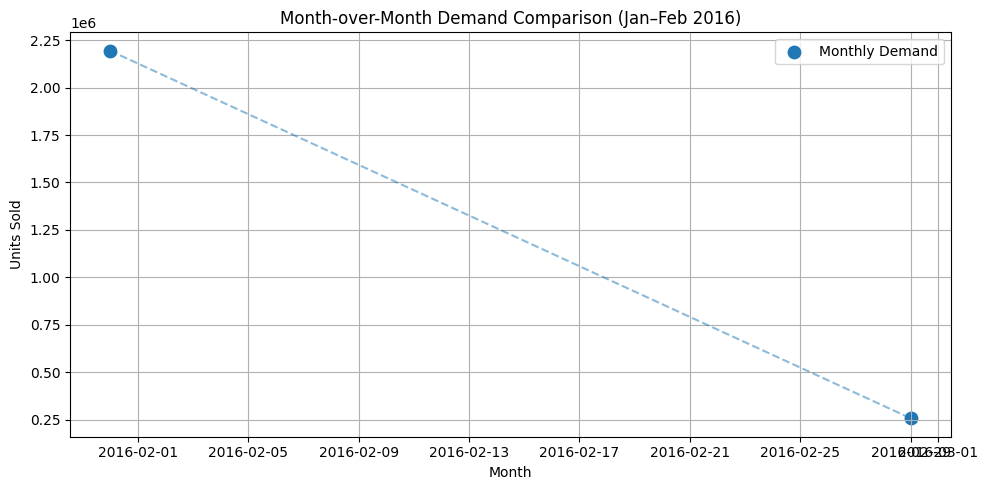

In [49]:
plt.figure(figsize=(10, 5))

plt.scatter(
    monthly_demand["SalesDate"],
    monthly_demand["SalesQuantity"],
    s=80,
    label="Monthly Demand"
)

plt.plot(
    monthly_demand["SalesDate"],
    monthly_demand["SalesQuantity"],
    linestyle="--",
    alpha=0.5
)

plt.title("Month-over-Month Demand Comparison (Jan–Feb 2016)")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This visualization compares observed monthly demand levels.
Due to the limited number of data points, the chart is intended
to highlight month-over-month differences rather than infer trends
or forecast future demand.



### Exploratory Demand Forecasting (Conceptual)

A simple 3-month moving average approach was explored to demonstrate
baseline demand forecasting concepts.

Due to limited monthly historical coverage in the dataset, visual trend
interpretation and forecast evaluation are not shown. This section is
included to illustrate methodology rather than produce actionable forecasts.


## Interpretation

The forecast suggests that if recent historical trends persist,
short-term demand is expected to remain close to recent average levels.

This estimate can support:
- High-level inventory planning
- Procurement volume estimation
- Short-term capacity planning


## Business Use and Scope Control

This forecast is intended for:
- Directional demand understanding
- Planning intuition

It should **not** be used for:
- SKU-level replenishment decisions
- Automated ordering systems
- Long-term strategic forecasting


## Summary of Forecasting Extension

- **Model:** Simple Moving Average (baseline time-series model)
- **Prediction Target:** Monthly total sales quantity
- **Forecast Horizon:** Next 3 months
- **Purpose:** Exploratory analysis for short-term planning

This section demonstrates how basic forecasting techniques can
complement descriptive and diagnostic analysis while maintaining
clear assumptions and limitations.


## Key Insights & Recommendations

- Revenue and units sold declined sharply month-over-month
- Inventory turnover reveals a meaningful portion of underperforming stock
- Operational focus should be on:
  - Reducing dead stock exposure
  - Protecting fast-moving SKUs
  - Conservative replenishment under demand uncertainty

## Limitations & Future Work

- Short time horizon limits trend inference
- No pricing elasticity or customer segmentation included
- Future work could integrate:
  - Multi-period forecasting
  - SKU-level demand prediction
  - Inventory optimization models


# End of Project
